# Assignment 2

# Graduate Admission

### This dataset is created for prediction of Graduate Admissions from an Indian perspective.

The dataset contains several parameters which are considered important during the application for Masters Programs.
The parameters included are :

* GRE Scores ( out of 340 )
* TOEFL Scores ( out of 120 )
* University Rating ( out of 5 )
* Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
* Undergraduate GPA ( out of 10 )
* Research Experience ( either 0 or 1 )
* Chance of Admit ( ranging from 0 to 1 )

# Import the Required Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import random

In [2]:
df = np.genfromtxt('Admission_Predict.csv',delimiter = ',', dtype=str);
df

array([['Serial No.', 'GRE Score', 'TOEFL Score', ..., 'CGPA',
        'Research', 'Chance of Admit'],
       ['1', '337', '118', ..., '9.65', '1', '0.92'],
       ['2', '324', '107', ..., '8.87', '1', '0.76'],
       ...,
       ['398', '330', '116', ..., '9.45', '1', '0.91'],
       ['399', '312', '103', ..., '8.78', '0', '0.67'],
       ['400', '333', '117', ..., '9.66', '1', '0.95']], dtype='<U17')

In [3]:
headers = df[0,1:]; # TO not take serial no
print(headers)
data = np.array(df[1:,1:], dtype=float); # This will take from the GRE Score
print(data)

['GRE Score' 'TOEFL Score' 'University Rating' 'SOP' 'LOR ' 'CGPA'
 'Research' 'Chance of Admit']
[[337.   118.     4.   ...   9.65   1.     0.92]
 [324.   107.     4.   ...   8.87   1.     0.76]
 [316.   104.     3.   ...   8.     1.     0.72]
 ...
 [330.   116.     4.   ...   9.45   1.     0.91]
 [312.   103.     3.   ...   8.78   0.     0.67]
 [333.   117.     4.   ...   9.66   1.     0.95]]


In [4]:
data_norm = (data-np.mean(data, axis = 0))/np.std(data, axis = 0)

In [5]:
# Extract y from data

y_label = 'Chance of Admit';
y_index = np.where(headers == y_label)[0][0];
y = data_norm[:,y_index];

# Extract x from data

X = data_norm[:,0:y_index];

In [6]:
# Insert column of 1's for intercept column
X = np.insert(X, 0, 1, axis=1) # added the intercept

In [7]:
print(X.shape)

(400, 8)


In [8]:
print(y.shape)

(400,)


In [9]:
print(X[0])

[1.         1.76210664 1.74697064 0.79882862 1.09386422 1.16732114
 1.76481828 0.90911166]


In [10]:
m = X.shape[0]
n = X.shape[1]

In [11]:
# Partion data into training and test datasets

idx = np.arange(0,m)
random.shuffle(idx)

percent_train = .6
m_train = int(m * percent_train)
train_idx = idx[0:m_train]
test_idx = idx[m_train:m+1]
X_train = data[train_idx,1:y_index];
X_test = data[test_idx,1:y_index];

y_train = data[train_idx,y_index];
y_test = data[test_idx,y_index];


In [12]:
# Cost function normalized by number of examples

def H(theta,X,y):
    return 1 / 2 / X.shape[1] * (h(X,theta)-y).T.dot(h(X,theta)-y)

In [13]:
# Solve the normal equations

def regress(X, y):
    cov = np.dot(X.T, X)
    cov_inv = np.linalg.inv(cov)
    theta = np.dot(cov_inv, np.dot(X.T, y))
    return theta
regress(X,y)

array([ 8.70408612e-16,  1.39783600e-01,  1.24258432e-01,  4.58476504e-02,
       -2.33355774e-02,  1.40830779e-01,  4.97342141e-01,  8.57053356e-02])

In [14]:
# Cost function normalized by number of examples

def J(theta,X,y):
    return 1 / 2 / X.shape[1] * (h(X,theta)-y).T.dot(h(X,theta)-y)

# Get design matrix for polynomial model of degree d

def x_polynomial(x, d):
    a = np.ones((x.shape[0], 1))    
    for i in range(d):
        a = np.concatenate((a,x**(i+1)), axis = 1)
    return a


In [15]:
# Build models of degree 1 to max_degree

max_degree = 2

J_train = np.zeros(max_degree)
J_test = np.zeros(max_degree)


# Split the data into training and tests

In [16]:
# splits the training and test data set in 80% : 20%
# assign random_state to any value.This ensures consistency.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 8)
(80, 8)
(320,)
(80,)


# Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [18]:
# model evaluation for training set

y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set

y_test_predict = lin_model.predict(X_test)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))

# r-squared score of the model
r2 = r2_score(y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 0.4535600939850745
R2 score is 0.8069022125298158


The model performance for testing set
--------------------------------------
RMSE is 0.40541316382029674
R2 score is 0.772829262603884


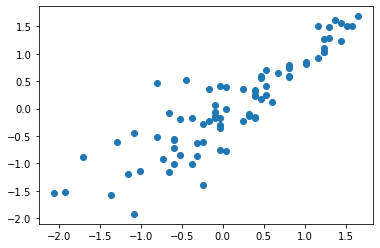

In [19]:
# plotting the y_test vs y_pred
# ideally should have been a straight line
plt.scatter(y_test, y_test_predict)
plt.show()


# Polynomial Regression

Let's apply the Polynomial Regression with degree 2 and test.

To generate the higher order degrees, we use PolyniomialFeatures class from sklearn library.

In [22]:
from sklearn.preprocessing import PolynomialFeatures

def polynomial_regression_model(degree):
  "Creates a polynomial regression model for the given degree"
  poly_features = PolynomialFeatures(degree=degree)
  
  # transform the features to higher degree features.
  X_train_poly = poly_features.fit_transform(X_train)
  
  # fit the transformed features to Linear Regression
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, y_train)
  
  # predicting on training data-set
  y_train_predicted = poly_model.predict(X_train_poly)
  
  # predicting on test data-set
  y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  
  # evaluating the model on training dataset
  rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
  r2_train = r2_score(y_train, y_train_predicted)
  
  # evaluating the model on test dataset
  rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
  r2_test = r2_score(y_test, y_test_predict)
  
  print("The model performance for the training set")
  print("-------------------------------------------")
  print("RMSE of training set is {}".format(rmse_train))
  print("R2 score of training set is {}".format(r2_train))
  
  print("\n")
  print("The model performance for the test set")
  print("-------------------------------------------")
  print("RMSE of test set is {}".format(rmse_test))
  print("R2 score of test set is {}".format(r2_test))

In [23]:
polynomial_regression_model(2)

The model performance for the training set
-------------------------------------------
RMSE of training set is 0.42904975210889146
R2 score of training set is 0.8272082770286167


The model performance for the test set
-------------------------------------------
RMSE of test set is 0.4071697317313779
R2 score of test set is 0.7708564341794006
